In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd

pd.set_option('display.max_rows', None)


cereal_data = pd.read_csv("cereal.csv")
cereal_data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [4]:
# remove negatives 

cereal_data = cereal_data[(cereal_data.carbo >= 0) & (cereal_data.potass >= 0) & (cereal_data.carbo >= 0)]
cereal_data[cereal_data == -1].count(axis=0)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [75]:
# 1. Which cereals have more than the suggested 6 grams of sugar per serving?

most_sugars = cereal_data[cereal_data.sugars > 6].sort_values(by = 'sugars', ascending = False)
most_sugars

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
30,Golden Crisp,P,C,100,2,0,45,0.0,11.0,15,40,25,1,1.00,0.88,35.252444
66,Smacks,K,C,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785
52,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594
46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351
24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1.00,22.736446
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1.00,22.396513
29,Fruity Pebbles,P,C,110,1,1,135,0.0,13.0,12,25,25,2,1.00,0.75,28.025765


In [6]:
# Finding the total number

most_sugars = cereal_data[cereal_data.sugars > 6].shape[0]
most_sugars

38

In [76]:
# Finding just the names of the cereals with more than 6 g of sugar.
most_sugars.name

30                              Golden Crisp
66                                    Smacks
6                                Apple Jacks
70                         Total Raisin Bran
52                     Post Nat. Raisin Bran
46                      Mueslix Crispy Blend
24                               Froot Loops
14                               Cocoa Puffs
18                             Count Chocula
29                            Fruity Pebbles
28                             Fruitful Bran
42                              Lucky Charms
17                                 Corn Pops
58                               Raisin Bran
10                              Cap'n'Crunch
73                                      Trix
37                                Honey-comb
25                            Frosted Flakes
45         Muesli Raisins; Peaches; & Pecans
44          Muesli Raisins; Dates; & Almonds
35                          Honey Graham Ohs
27    Fruit & Fibre Dates; Walnuts; and Oats
51        

In [54]:
# 2. Which brand out of the two (Kellogs & General Mills) has the most average gram of sugar in the cereals?

# To find General Mills average sugar value. 

avg_sugars_G = cereal_data[ cereal_data['mfr'] == 'G']['sugars'].mean()
avg_sugars_G

7.954545454545454

In [55]:
# To find Kellogs average sugar value.

avg_sugars_K = cereal_data[ cereal_data['mfr'] == 'K']['sugars'].mean()
avg_sugars_K

7.565217391304348

In [56]:
# 3. Is there a relationship between sodium and sugar levels in cereal?
# Sort greatest to least sodium levels

high_sodium = cereal_data.sort_values('sodium', ascending = False)
high_sodium

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
53,Product 19,K,C,100,3,0,320,1.0,20.0,3,45,100,3,1.00,1.00,41.503540
62,Rice Krispies,K,C,110,2,0,290,0.0,22.0,3,35,25,1,1.00,1.00,40.560159
16,Corn Flakes,K,C,100,2,0,290,1.0,21.0,2,35,25,1,1.00,1.00,45.863324
11,Cheerios,G,C,110,6,2,290,2.0,17.0,1,105,25,1,1.00,1.25,50.764999
31,Golden Grahams,G,C,110,1,1,280,0.0,15.0,9,45,25,2,1.00,0.75,23.804043
15,Corn Chex,R,C,110,2,0,280,0.0,22.0,3,25,25,1,1.00,1.00,41.445019
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
40,Kix,G,C,110,2,1,260,0.0,21.0,3,40,25,2,1.00,1.50,39.241114
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.00,0.75,39.106174
36,Honey Nut Cheerios,G,C,110,3,1,250,1.5,11.5,10,90,25,1,1.00,0.75,31.072217


In [57]:
# Sort greatest to least sugar 

high_sugars = cereal_data.sort_values('sugars', ascending = False)
high_sugars

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
66,Smacks,K,C,110,2,1,70,1.0,9.0,15,40,25,2,1.00,0.75,31.230054
30,Golden Crisp,P,C,100,2,0,45,0.0,11.0,15,40,25,1,1.00,0.88,35.252444
70,Total Raisin Bran,G,C,140,3,1,190,4.0,15.0,14,230,100,3,1.50,1.00,28.592785
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
52,Post Nat. Raisin Bran,P,C,120,3,1,200,6.0,11.0,14,260,25,3,1.33,0.67,37.840594
24,Froot Loops,K,C,110,2,1,125,1.0,11.0,13,30,25,2,1.00,1.00,32.207582
18,Count Chocula,G,C,110,1,1,180,0.0,12.0,13,65,25,2,1.00,1.00,22.396513
46,Mueslix Crispy Blend,K,C,160,3,2,150,3.0,17.0,13,160,25,3,1.50,0.67,30.313351
14,Cocoa Puffs,G,C,110,1,1,180,0.0,12.0,13,55,25,2,1.00,1.00,22.736446
17,Corn Pops,K,C,110,1,0,90,1.0,13.0,12,20,25,2,1.00,1.00,35.782791


In [58]:
# 4. Which cereal has the most grams of complex carbohydrates and which one has the least?
# Sort through carbs

# highest carbs
most_carbs = cereal_data.sort_values('carbo', ascending = False).head(1)
most_carbs

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
61,Rice Chex,R,C,110,1,0,240,0.0,23.0,2,30,25,1,1.0,1.13,41.998933


In [59]:
# least carbs

least_carbs = cereal_data.sort_values('carbo', ascending = False).tail(1)
least_carbs

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973


In [63]:
# 5. Which manufacturer has the highest calories?

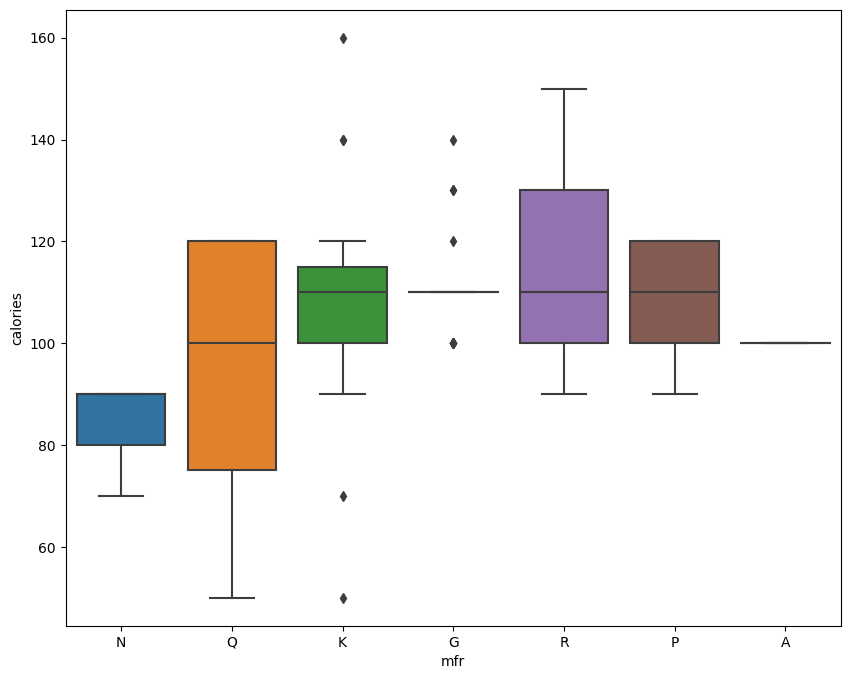

In [65]:
plt.figure(figsize = (10, 8 ))
sns.boxplot(cereal_data, x = 'mfr', y = "calories")

plt.show()

In [67]:
# 6. Compare the lowest rated cereal and the highest rated one.

# lowest
cereal_data.loc[cereal_data['rating'] == min(cereal_data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851


In [66]:
# highest
cereal_data.loc[cereal_data['rating'] == max(cereal_data.rating)] 

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


In [26]:
# 7. What are each brand's highest rated cereal?

In [25]:
# find top 3 brands
cereal_data.value_counts('mfr')

mfr
K    23
G    22
P     9
R     7
Q     7
N     5
A     1
dtype: int64

In [38]:
# K highest rated cereal

cereal_data.loc[cereal_data['mfr'] == 'K'].sort_values('rating', ascending = False).head(1)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


In [42]:
# G highest rated cereal

cereal_data.loc[cereal_data['mfr'] == 'G'].sort_values('rating', ascending = False).head(1)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.0,51.592193


In [43]:
# P highest rated cereal

cereal_data.loc[cereal_data['mfr'] == 'P'].sort_values('rating', ascending = False).head(1)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
33,Grape-Nuts,P,C,110,3,0,170,3.0,17.0,3,90,25,3,1.0,0.25,53.371007


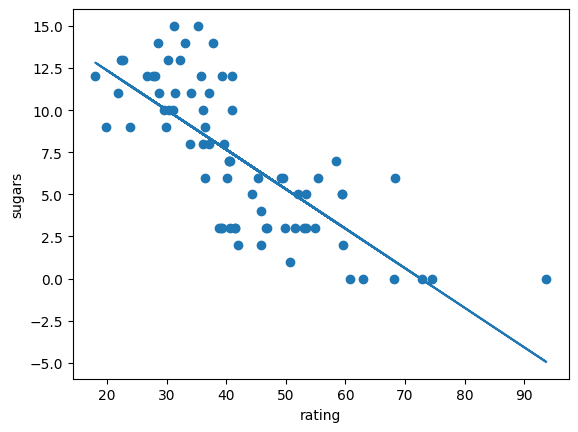

In [11]:
# 8. Can we predict ratings in relation to sugar?

x = cereal_data['rating'].values.reshape(-1, 1)
y= cereal_data['sugars']

lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred = lr_model.predict(x)

plt.scatter(x, y)
plt.xlabel('rating')
plt.ylabel('sugars')

plt.plot(x, y_pred)

<AxesSubplot:xlabel='shelf', ylabel='rating'>

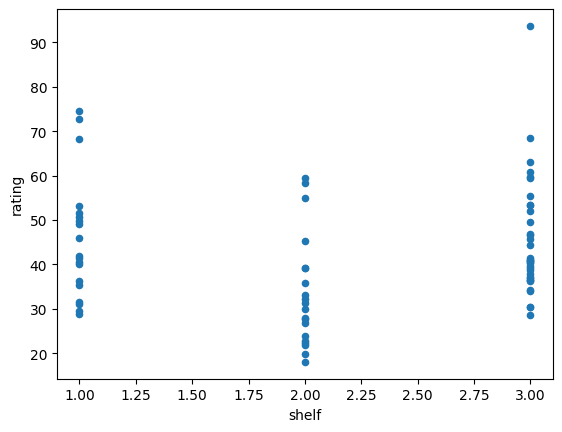

In [52]:
# 9. Can display shelf level affect rating?

cereal_data.plot.scatter(x = 'shelf', y= 'rating')

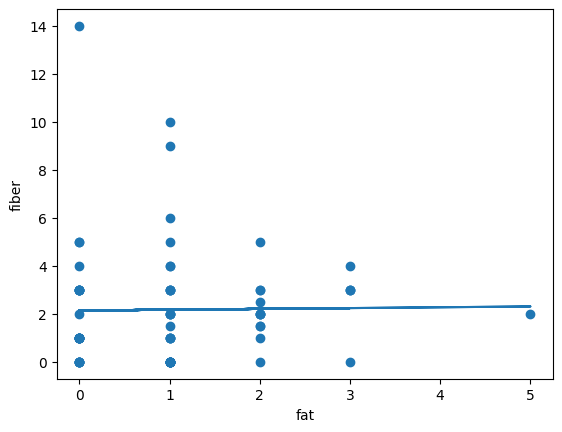

In [74]:
# 10. Is there a correlation between fat and fiber? 

x = cereal_data['fat'].values.reshape(-1, 1)
y= cereal_data['fiber']

lr_model = LinearRegression()
lr_model.fit(x, y)
y_pred = lr_model.predict(x)

plt.scatter(x, y)
plt.xlabel('fat')
plt.ylabel('fiber')

plt.plot(x, y_pred)